In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data:

In [5]:
import kagglehub

In [7]:
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")
print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 8.89M/8.89M [00:01<00:00, 7.36MB/s]

Extracting files...


Path to dataset files: /Users/zakaria/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2


In [9]:
credits_df = pd.read_csv(f"{path}/tmdb_5000_credits.csv")
movies_df = pd.read_csv(f"{path}/tmdb_5000_movies.csv")

In [13]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [41]:
credits_df.shape

(4803, 4)

In [43]:
movies_df.shape

(4803, 20)

In [245]:
# Change the "movie_id" to "id" to perform a merge between the two dfs:
credits_df.columns = ['id', 'title', 'cast', 'crew']

In [247]:
df = movies_df.merge(credits_df, on="id")

In [249]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [45]:
df.shape

(4803, 23)

In [120]:
# Check the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [124]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

## Demographic Filtering

Before getting started with this
* we need a metric to score or rate a movie
* Calculate the score for every movie
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :

<div align="center">
    <img src="wr.png" alt="Alt text" width="500" height="300">
</div>

where:
* v is the number of votes for the movie
* m is the minimum votes required to be listed in the chart
* R is the average rating of the movie
* C is the mean vote across the whole report

In [ ]:
We already have <b>v(vote_count)</b> and <b>R(vote_average)</b> and C can be calculated as:

In [132]:
C = df['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10. <br>
The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart.
- For a movie to feature in the charts, it must have more votes than <b>the Median(at least 50%)</b> of the movies in the list.

In [176]:
df['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [208]:
m = df['vote_count'].describe()['50%']
m

235.0

Now, we can filter out the movies that qualify for the chart

In [211]:
# Now, we can filter out the movies that qualify for the chart
q_movies = df[df['vote_count'] >= m].copy()
q_movies.shape

(2407, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [214]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [229]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [232]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False).reset_index(drop=True)

#Print the top 15 movies
q_movies[['title_y', 'vote_count', 'vote_average', 'score']].head(10)

,title_y,vote_count,vote_average,score
0,The Shawshank Redemption,8205,8.5,8.432957
1,The Godfather,5893,8.4,8.311498
2,Fight Club,9413,8.3,8.246223
3,Pulp Fiction,8428,8.3,8.240109
4,Schindler's List,4329,8.3,8.186319
5,Whiplash,4254,8.3,8.184420
6,Spirited Away,3840,8.3,8.172677
7,The Dark Knight,12002,8.2,8.159521
8,The Godfather: Part II,3338,8.3,8.154789
9,Forrest Gump,7927,8.2,8.139311


Hurray! We have made our first(though very basic) recommender. Under the <b>Best Rated of all time</b> <i><u>tab</u></i> of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

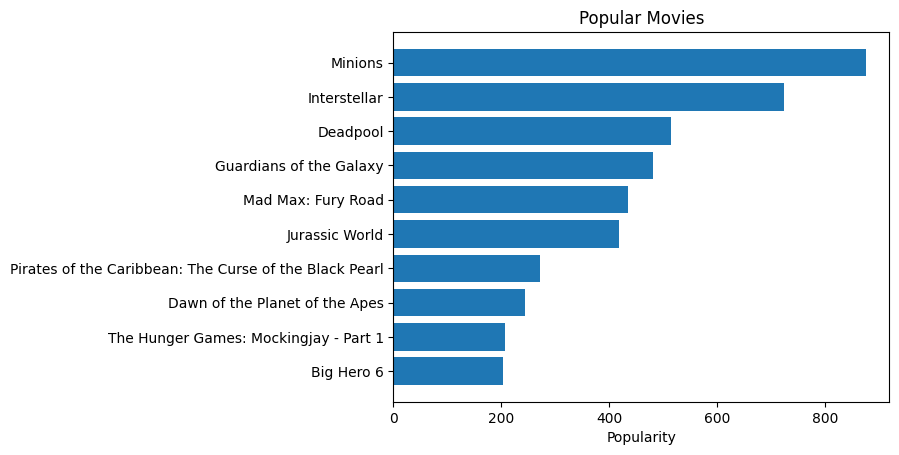

In [263]:
pop= df.sort_values('popularity', ascending=False)

plt.barh(pop['title_y'].head(10), pop['popularity'].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

plt.show()

This to be under the <b>Popular movies of all time</b> <i><u>tab</u></i>.

## Content Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

We will compute pairwise similarity scores for all movies based on <u>their plot descriptions</u> and recommend movies based on that similarity score. The plot description is given in the <b>overview</b> feature of our dataset. Let's take a look at the data.

In [280]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as <b>(term instances/total instances)</b>. Inverse Document Frequency is the relative count of documents containing the term is given as <b>log(number of documents/documents with term)</b> The overall importance of each word to the documents in which they appear is equal to <b>TF * IDF</b>.

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [294]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words
tfidf = TfidfVectorizer(stop_words='english')

df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

In [296]:
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

<div align="center">
    <img src="cosin_similarity.png" alt="Alt text" width="500" height="300">
</div>

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's <b>linear_kernel()</b> instead of <b>cosine_similarities()</b> since it is faster.

In [322]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

* We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.
* Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [341]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title_y']).drop_duplicates()

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element * is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [525]:
# Function that takes in 'movie title' as input and outputs 'most similar movies'
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title_y'].iloc[movie_indices]

In [355]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_y, dtype: object

In [422]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_y, dtype: object

In [430]:
get_recommendations('The Godfather')

2731     The Godfather: Part II
1873                 Blood Ties
867     The Godfather: Part III
3727                 Easy Money
3623                       Made
3125                     Eulogy
3896                   Sinister
4506            The Maid's Room
3783                        Joe
2244      The Cold Light of Day
Name: title_y, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

## Credits, Genres and Keywords Based Recommender

It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata:
* The 3 top actors
* The director
* Related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [449]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

Next, we'll write functions that will help us to extract the required information from each feature.

In [458]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [465]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [467]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [473]:
# Print the new features of the first 5 films
df[['title_y', 'cast', 'director', 'keywords', 'genres']].head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,title_y,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. <br>
--> This is done so that our vectorizer <b>doesn't</b> count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [485]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [487]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [489]:
# Print the new features of the first 5 films
df[['title_y', 'cast', 'director', 'keywords', 'genres']].head()

,title_y,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


We are now in a position to create our <b>"metadata soup"</b>, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [496]:
def create_metadata_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [498]:
df['soup'] = df.apply(create_metadata_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF.
This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [511]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [515]:
count_matrix.shape

(4803, 11520)

In [517]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [519]:
cosine_sim2.shape

(4803, 4803)

In [521]:
# Reset index of our main DataFrame and construct reverse mapping as before
df = df.reset_index()
indices = pd.Series(df.index, index=df['title_y'])

We can now reuse our <b>get_recommendations()</b> function by passing in the new cosine_sim2 matrix as your second argument.

In [528]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title_y, dtype: object

In [530]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title_y, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.

## Collaborative Filtering

Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the Surprise library to implement SVD.

In [544]:
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")
print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 228M/228M [00:13<00:00, 18.0MB/s]

Extracting files...


Path to dataset files: /Users/zakaria/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [548]:
ratings = pd.read_csv(f'{path}/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


--> <b>Note:</b> that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [573]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import KFold, cross_validate

In [603]:
# Load data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

svd = SVD()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8981  0.8965  0.8950  0.8972  0.8956  0.8965  0.0011  
MAE (testset)     0.6902  0.6874  0.6912  0.6926  0.6916  0.6906  0.0018  
Fit time          0.36    0.35    0.35    0.36    0.34    0.35    0.01    
Test time         0.03    0.04    0.62    0.03    0.03    0.15    0.24    


In [605]:
# Get average performance
print(f"Average RMSE: {results['test_rmse'].mean():.4f}")
print(f"Average MAE: {results['test_mae'].mean():.4f}")

Average RMSE: 0.8965
Average MAE: 0.6906


--> We get a mean Root Mean Sqaure Error of <b>0.89</b> approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [611]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [613]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [615]:
svd.predict(1, 31, 3)

Prediction(uid=1, iid=31, r_ui=3, est=2.300444333406492, details={'was_impossible': False})

* For movie with ID <u>302</u>, we get an estimated prediction of <b>2.3</b>. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

In [620]:
svd.predict(1, 1172, 3)

Prediction(uid=1, iid=1172, r_ui=3, est=3.5391208398169027, details={'was_impossible': False})

* For movie with ID <u>1172</u>, we get an estimated prediction of <b>2.3</b>. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

## Hybrid Recommender

In this section, I will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

Input: User ID and the Title of a Movie
Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [647]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [670]:
md = pd.read_csv(f"{path}/movies_metadata.csv")
md = md.drop([19730, 29503, 35587])

links_small = pd.read_csv(f"{path}/links_small.csv")
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

md['id'] = md['id'].astype('int')
smd = md[md['id'].isin(links_small)]
smd.shape

/var/folders/qj/vw64m9jj35b0z5jsg7f4pxrw0000gn/T/ipykernel_3430/2674657523.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  md = pd.read_csv(f"{path}/movies_metadata.csv")


(9099, 24)

In [674]:
id_map = pd.read_csv(f'{path}/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')

We have 9099 movies avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

In [714]:
indices_map = id_map.set_index('id')

In [732]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_date', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [734]:
hybrid(1, 'Avatar')

,title,vote_count,vote_average,release_date,id,est
1218,The Treasure of the Sierra Madre,285.0,7.9,1948-01-24,3090,3.521114
1238,Akira,792.0,7.8,1988-07-16,149,3.053887
3723,Saving Grace,115.0,6.3,2000-01-24,2360,3.033334
2546,Son of Frankenstein,42.0,7.0,1939-01-13,3077,2.997986
1943,The Computer Wore Tennis Shoes,28.0,5.8,1969-12-29,29228,2.945258
1147,Paths of Glory,565.0,8.2,1957-09-18,975,2.935240
3351,The Color of Paradise,34.0,7.1,1999-02-08,17078,2.914693
3483,The Lords of Flatbush,18.0,5.7,1974-05-01,38925,2.762088
745,Stalingrad,116.0,7.4,1993-01-21,11101,2.756632
4454,Waxwork,71.0,5.7,1988-06-17,29095,2.687425


In [736]:
hybrid(500, 'Avatar')

,title,vote_count,vote_average,release_date,id,est
1218,The Treasure of the Sierra Madre,285.0,7.9,1948-01-24,3090,3.615040
1147,Paths of Glory,565.0,8.2,1957-09-18,975,3.445721
3351,The Color of Paradise,34.0,7.1,1999-02-08,17078,3.273072
1238,Akira,792.0,7.8,1988-07-16,149,3.239546
341,Backbeat,37.0,6.2,1994-04-01,12635,3.167227
3483,The Lords of Flatbush,18.0,5.7,1974-05-01,38925,3.016773
3723,Saving Grace,115.0,6.3,2000-01-24,2360,2.995405
1943,The Computer Wore Tennis Shoes,28.0,5.8,1969-12-29,29228,2.993286
2546,Son of Frankenstein,42.0,7.0,1939-01-13,3077,2.982316
3598,Bird on a Wire,209.0,5.9,1990-05-18,1727,2.972834


--> We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users.

### Conclusion

We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. This model was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from:
* https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook#Collaborative-Filtering
* https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75
* https://www.kaggle.com/rounakbanik/movie-recommender-systems
* http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf

